In [ ]:
import pandas as pd
import numpy as np
import PIL
from PIL import Image

import cv2
import os

from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

import dlib
from skimage import io
import matplotlib.pyplot as plt
from numpy import asarray


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imgPath=[]
resize= 1
frame_count_real = []
frame_count_fake = []


# Function to extract frames
def FrameCapture(path,globalCount,type_dataset,label):
    frame_count=[]
    imgPath = []
    temp = 0
    v_cap = cv2.VideoCapture(path)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Pick 'n_frames' evenly spaced frames to sample
    sample = np.linspace(0, v_len - 1, n_frames).astype(int) #Index in sample array are the frames which will be extracted.

    # Loop through frames
    
    frames = []
    for j in range(v_len):
        success = v_cap.grab()
        if j in sample:
            # Load frame
            success, frame = v_cap.read()
            if not success:
                
                continue
            
            frame = Image.fromarray(frame)
            
            # Resize frame to desired size
            if resize is not None:
                frame = frame.resize([int(d * resize) for d in frame.size])
                frame = np.asarray(frame)
            frames.append(frame)
    
    # Used as counter variable
  
    # checks whether frames were extracted
    count = globalCount
    currentCount = 0
    success = 1
  
    while success and currentCount<min(n_frames,len(frames)):
  

        cv2.imwrite("All_Images/" + str(type_dataset) + "_"+ str(label) + "_frame%d.jpg" % (count//n_frames),frames[int(currentCount)])

        imgPath.append("All_Images/" + str(type_dataset) + "_"+ str(label) + "_frame%d.jpg"%(count//n_frames))
  
        count += n_frames
        currentCount += 1
      
    if(type_dataset=="Test"):
      frame_count.append(currentCount)

    return imgPath,count,frame_count



In [ ]:
import os


n_frames = 32
resize= 1

def captureFrame(type_dataset,label):
  imgPath = []
  frame_count = []
  count = 0
  video_label=[]
  for file in os.listdir("/content/drive/MyDrive/Deepfake_Mix/"+str(type_dataset)+"/"+str(label)):
      path=os.path.join("/content/drive/MyDrive/Deepfake_Mix/"+str(type_dataset)+"/"+str(label), file)
      temp , count ,x= FrameCapture(path,count,type_dataset,label)
      imgPath = imgPath +  temp
      if (type_dataset == 'Test'):
        frame_count.append(x[0])
        if label=='Fake':
          video_label.append(0)
        else:
          video_label.append(1)
  return imgPath,frame_count,video_label

In [ ]:
imgPath_train_fake,  frame_count_train_fake, _= captureFrame("Train","Fake")
imgPath_train_real,  frame_count_train_real, _= captureFrame("Train","Real")
imgPath_val_fake,  frame_count_val_fake, video_label_val_fake= captureFrame("Val","Fake")
imgPath_val_real,  frame_count_val_real, video_label_val_real= captureFrame("Val","Real")
imgPath_test_fake,  frame_count_test_fake, video_label_test_fake= captureFrame("Test","Fake")
imgPath_test_real,  frame_count_test_real, video_label_test_real= captureFrame("Test","Real")

In [ ]:
print(len(imgPath_train_fake))
print(len(imgPath_train_real))
print(imgPath_val_fake)
print(imgPath_val_real)
print(len(imgPath_test_fake))
print(len(imgPath_test_real))

1348
1456
['All_Images/Val_Fake_frame0.jpg', 'All_Images/Val_Fake_frame1.jpg', 'All_Images/Val_Fake_frame2.jpg', 'All_Images/Val_Fake_frame3.jpg', 'All_Images/Val_Fake_frame4.jpg', 'All_Images/Val_Fake_frame5.jpg', 'All_Images/Val_Fake_frame6.jpg', 'All_Images/Val_Fake_frame7.jpg', 'All_Images/Val_Fake_frame8.jpg', 'All_Images/Val_Fake_frame9.jpg', 'All_Images/Val_Fake_frame10.jpg', 'All_Images/Val_Fake_frame11.jpg', 'All_Images/Val_Fake_frame12.jpg', 'All_Images/Val_Fake_frame13.jpg', 'All_Images/Val_Fake_frame14.jpg', 'All_Images/Val_Fake_frame15.jpg', 'All_Images/Val_Fake_frame16.jpg', 'All_Images/Val_Fake_frame17.jpg', 'All_Images/Val_Fake_frame18.jpg', 'All_Images/Val_Fake_frame19.jpg', 'All_Images/Val_Fake_frame20.jpg', 'All_Images/Val_Fake_frame21.jpg', 'All_Images/Val_Fake_frame22.jpg', 'All_Images/Val_Fake_frame23.jpg', 'All_Images/Val_Fake_frame24.jpg', 'All_Images/Val_Fake_frame25.jpg', 'All_Images/Val_Fake_frame26.jpg', 'All_Images/Val_Fake_frame27.jpg', 'All_Images/Val_Fak

#MTCNN

In [ ]:
pip install mtcnn

In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 


# draw each face separately
def draw_faces(filename, result_list,Count,processedImagePath_MTCNN,type_dataset,label):
  # load the image
  data = pyplot.imread(filename)
  # plot each face as a subplot
  count = Count
  processedImagePath_MTCNN=[]
  for i in range(len(result_list)):
   # get coordinates
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    if x1 < 0:
      x1 = 0
    if y1<0:
      y1=0
    if x2 > data.shape[1]:
      x2 = data.shape[1]
    if y2>data.shape[0]:
      y2=data.shape[0]
    
    resize_face = cv2.resize(data[y1:y2, x1:x2],(64, 64), interpolation=cv2.INTER_CUBIC)
    finalImg = cv2.cvtColor(resize_face, cv2.COLOR_BGR2RGB)
    cv2.imwrite("MTCNN" + "_" + str(type_dataset) + "_" + str(label) + "/mtcnn%d.jpg" % count,finalImg)
    processedImagePath_MTCNN.append("MTCNN" + "_" + str(type_dataset) + "_" + str(label) + "/mtcnn%d.jpg"%count)
    count+=1
  
  return count,processedImagePath_MTCNN
 


def faceDetect_MTCNN(type_dataset,label,imgPath):
  count = 0
  processedImagePath_MTCNN=[]
  for i in range(len(imgPath)):
      filename = imgPath[i]
      # load image from file
      pixels = pyplot.imread(filename)
      # create the detector, using default weights
      detector = MTCNN()
      # detect faces in the image
      faces = detector.detect_faces(pixels)
      count,l=draw_faces(filename, faces,count,processedImagePath_MTCNN,type_dataset,label)
      processedImagePath_MTCNN.append(l)
  return processedImagePath_MTCNN


In [ ]:
processedImagePath_Train_Fake_mtcnn = faceDetect_MTCNN("Train","Fake",imgPath_train_fake)

In [ ]:
print(len(processedImagePath_Train_Fake_mtcnn))

In [ ]:
processedImagePath_Train_Real_mtcnn = faceDetect_MTCNN("Train","Real",imgPath_train_real)

In [ ]:
print(len(processedImagePath_Train_Real_mtcnn))

1456


In [ ]:
processedImagePath_Test_Fake_mtcnn = faceDetect_MTCNN("Test","Fake",imgPath_test_fake)

In [ ]:
print(len(processedImagePath_Test_Fake_mtcnn))

In [95]:
processedImagePath_Test_Real_mtcnn = faceDetect_MTCNN("Test","Real",imgPath_test_real)

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fa748e54170>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 358, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


In [96]:
print(len(processedImagePath_Test_Real_mtcnn))

735


#Training

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from skimage.color import rgb2grey
from skimage.feature import hog

def create_features(img):
    
    # convert image to greyscale
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    features=[]
    for i in gray:
      for j in i:
        features.append(j)
    
    return features


In [98]:
def createFeatureDatabase(real_list, fake_list):
  train=[]
  label = []

  

  for i in range(len(fake_list)):
    
    for j in fake_list[i]:
      img = cv2.imread(j)
      tmp_features = create_features(img)
      train.append(tmp_features)
      label.append(0)

  for i in range(len(real_list)):
    for j in real_list[i]:
      img = cv2.imread(j)
      tmp_features = create_features(img)
      train.append(tmp_features)
      label.append(1)

  

  return train,label

In [99]:


train_data,label_data = createFeatureDatabase(processedImagePath_Train_Real_mtcnn,processedImagePath_Train_Fake_mtcnn)


In [100]:

len(train_data)

2937

In [101]:
test_data, test_label = createFeatureDatabase(processedImagePath_Test_Real_mtcnn,processedImagePath_Test_Fake_mtcnn)

##Standard Scaler

In [102]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(train_data)  
train_data_ss = scaler.transform(train_data)  
test_data_ss = scaler.transform(test_data)

##LDA

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_train_data = lda.fit_transform(train_data_ss, label_data)


In [104]:
lda_test_data=lda.transform(test_data_ss)

In [105]:
lda.explained_variance_ratio_

array([1.])

In [106]:
lda_train_data

array([[-3.70770355],
       [-5.18092635],
       [-6.04545888],
       ...,
       [ 4.51993163],
       [ 3.68108201],
       [ 5.31099164]])

In [107]:
len(lda_train_data[0])

1

##PCA

In [108]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca_train_data=pca.fit_transform(train_data_ss)

In [109]:
pca_test_data=pca.transform(test_data_ss)

In [ ]:
pca.explained_variance_ratio_

In [111]:
pca_train_data

array([[-2.13956232e+01,  2.45818976e+00,  2.14428439e+00, ...,
         5.42839834e-01,  4.58168187e-01,  2.08260015e-01],
       [-2.16622867e+01,  1.83912645e+00,  6.87383183e-01, ...,
        -2.09213279e-01,  4.28190210e-01,  1.62607612e-01],
       [-2.09869410e+01,  2.34758592e+00,  1.66252561e+00, ...,
         4.16651420e-01,  5.96440389e-01,  3.17113495e-01],
       ...,
       [ 4.41603507e+01,  2.20318269e+01, -6.40112928e+00, ...,
         4.63923683e-01,  1.79989118e-01,  6.10122886e-01],
       [ 4.36898733e+01,  2.28141124e+01, -2.61455226e+00, ...,
         1.41351959e-01,  3.27371302e-01,  3.85846974e-02],
       [ 3.40082893e+01,  1.68607529e+01, -2.60953418e+00, ...,
        -3.22876582e-01, -2.35722368e-01,  1.17653890e-01]])

In [112]:
len(pca_train_data[0])

588

#DeepFake Result

In [113]:
def predictDeepFakeResult(predicted_test,frame_count_test):
  k=0
  prediction=[]
  len1=len(predicted_test)
  for i in frame_count_test:
    real_count=0
    fake_count=0
    for j in range(i):
      if predicted_test[k]==1:
        real_count+=1
      else:
        fake_count+=1
      k+=1
    if real_count>fake_count:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [114]:
actual_test_label=video_label_test_fake+video_label_test_real

##SVC

In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
def trainSVC(train_data, label_data, test_data,test_label):
  model = SVC()
  model.fit(train_data,label_data)
  print(model.score(test_data,test_label))
  cvs = cross_val_score(model, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = model.predict(test_data)
  return predicted_test, cvs

##SVC_LDA

In [116]:
predicted_test_SVC_lda, cvs_SVC_lda = trainSVC(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_SVC_lda

0.5434062292909212
[0.99319728 0.99829932 0.99659284 0.99318569 1.        ]


array([1, 1, 1, ..., 1, 1, 1])

In [117]:
print(predicted_test_SVC_lda)

[1 1 1 ... 1 1 1]


In [118]:
pred_SVC_lda=predictDeepFakeResult(predicted_test_SVC_lda,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_lda)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [119]:

accuracy_score(actual_test_label, pred_SVC_lda)

0.5

In [120]:

f1_score(actual_test_label, pred_SVC_lda)

0.6666666666666666

In [121]:

log_loss(actual_test_label,pred_SVC_lda)

17.26978799617044

##SVC_PCA

In [122]:
predicted_test_SVC_pca, cvs_SVC_pca =trainSVC(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_SVC_pca

0.6467859509609013
[0.3962585  0.5952381  0.72231687 0.57410562 0.72402044]


array([1, 1, 0, ..., 0, 1, 1])

In [123]:
pred_SVC_pca=predictDeepFakeResult(predicted_test_SVC_pca,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_pca)

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]


In [124]:

accuracy_score(actual_test_label, pred_SVC_pca)

0.66

In [125]:

f1_score(actual_test_label, pred_SVC_pca)

0.7213114754098361

In [126]:

log_loss(actual_test_label,pred_SVC_pca)

11.743407861550086

##SVC_Normal

In [127]:
predicted_test_SVC_normal, cvs_SVC_normal =trainSVC(train_data,label_data,test_data,test_label)
predicted_test_SVC_normal

0.6520874751491054
[0.3707483  0.61564626 0.69846678 0.560477   0.69505963]


array([1, 1, 0, ..., 0, 1, 1])

In [128]:
pred_SVC_normal=predictDeepFakeResult(predicted_test_SVC_normal,frame_count_test_fake+frame_count_test_real)
print(pred_SVC_normal)

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]


In [129]:

accuracy_score(actual_test_label, pred_SVC_normal)

0.66

In [130]:

f1_score(actual_test_label, pred_SVC_normal)

0.7213114754098361

In [131]:

log_loss(actual_test_label,pred_SVC_normal)

11.743407861550086

##Comparison

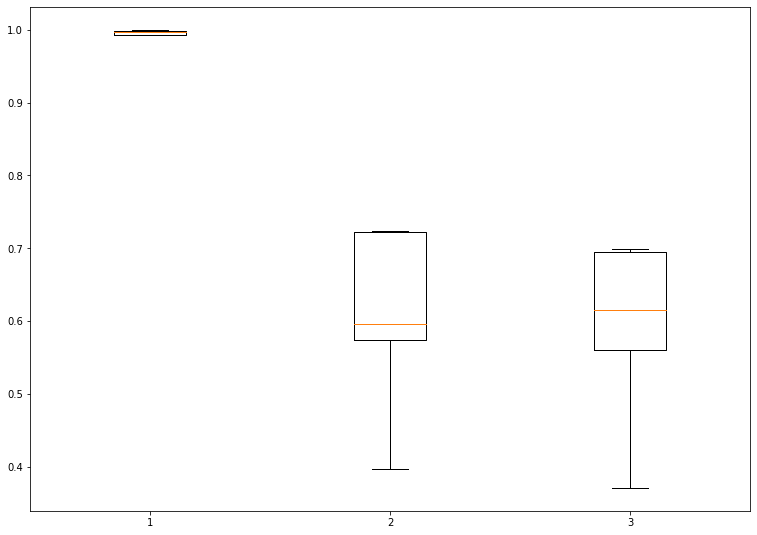

In [132]:
#BoxPlot for cross validation scores

data_SVC = [cvs_SVC_lda, cvs_SVC_pca, cvs_SVC_normal]

fig_SVC = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_SVC = fig_SVC.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_SVC = ax_SVC.boxplot(data_SVC)
  
# show plot
plt.show()

##MLP

In [133]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

def trainMLP(train_data, label_data, test_data,test_label):
  clf = MLPClassifier()
  clf=clf.fit(train_data,label_data)
  print(clf.score(test_data,test_label))
  cvs = cross_val_score(clf, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = clf.predict(test_data)
  return predicted_test, cvs

##MLP_LDA

In [134]:
predicted_test_MLP_lda, cvs_MLP_lda =trainMLP(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_MLP_lda

0.49768058316766073
[0.99319728 0.99829932 0.99829642 0.99318569 1.        ]


array([1, 1, 0, ..., 0, 1, 1])

In [135]:
pred_MLP_lda=predictDeepFakeResult(predicted_test_MLP_lda,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_lda)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]


In [136]:

accuracy_score(actual_test_label, pred_MLP_lda)

0.52

In [137]:

f1_score(actual_test_label, pred_MLP_lda)

0.5555555555555556

In [138]:

log_loss(actual_test_label,pred_MLP_lda)

16.578836556837583

##MLP_PCA

In [139]:
predicted_test_MLP_pca, cvs_MLP_pca =trainMLP(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_MLP_pca

0.607687210072896
[0.38265306 0.57142857 0.64906303 0.53492334 0.60477002]


array([1, 1, 1, ..., 1, 0, 1])

In [140]:
pred_MLP_pca=predictDeepFakeResult(predicted_test_MLP_pca,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_pca)

[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [141]:

accuracy_score(actual_test_label, pred_MLP_pca)

0.68

In [142]:

f1_score(actual_test_label, pred_MLP_pca)

0.7241379310344828

In [143]:

log_loss(actual_test_label,pred_MLP_pca)

11.052600349754666

##MLP_Normal

In [144]:
predicted_test_MLP_normal, cvs_MLP_normal =trainMLP(train_data,label_data,test_data,test_label)
predicted_test_MLP_normal

0.5142478462557986
[0.39115646 0.52891156 0.46848382 0.56218058 0.5451448 ]


array([0, 0, 0, ..., 0, 0, 0])

In [145]:
pred_MLP_normal=predictDeepFakeResult(predicted_test_MLP_normal,frame_count_test_fake+frame_count_test_real)
print(pred_MLP_normal)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [146]:

accuracy_score(actual_test_label, pred_MLP_normal)

0.48

In [147]:

f1_score(actual_test_label, pred_MLP_normal)

0.07142857142857142

In [148]:

log_loss(actual_test_label,pred_MLP_normal)

17.960195709250762

##Comparison

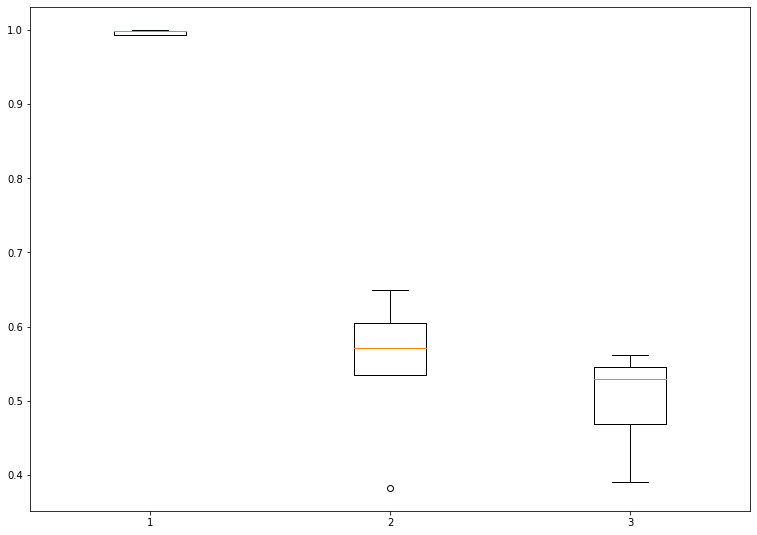

In [149]:
#BoxPlot for cross validation scores

data_MLP = [cvs_MLP_lda, cvs_MLP_pca, cvs_MLP_normal]

fig_MLP = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_MLP = fig_MLP.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_MLP = ax_MLP.boxplot(data_MLP)
  
# show plot
plt.show()

##KNN

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def trainKNN(train_data, label_data, test_data,test_label):
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(train_data,label_data)
  print(clf.score(test_data,test_label))
  cvs = cross_val_score(clf, train_data, label_data, cv=5)
  print(cvs)
  predicted_test = clf.predict(test_data)
  return predicted_test, cvs

##KNN_LDA

In [151]:
predicted_test_KNN_lda, cvs_KNN_lda =trainKNN(lda_train_data,label_data,lda_test_data,test_label)
predicted_test_KNN_lda

0.49768058316766073
[0.99489796 1.         0.99829642 0.98807496 1.        ]


array([1, 1, 0, ..., 0, 1, 1])

In [152]:
pred_KNN_lda=predictDeepFakeResult(predicted_test_KNN_lda,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_lda)

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]


In [153]:

accuracy_score(actual_test_label, pred_KNN_lda)

0.5

In [154]:

f1_score(actual_test_label, pred_KNN_lda)

0.5454545454545454

In [155]:

log_loss(actual_test_label,pred_KNN_lda)

17.269628076684402

##KNN_PCA

In [156]:
predicted_test_KNN_pca, cvs_KNN_pca =trainKNN(pca_train_data,label_data,pca_test_data,test_label)
predicted_test_KNN_pca

0.5838303512259775
[0.38945578 0.50680272 0.56388416 0.55366269 0.79216354]


array([1, 1, 1, ..., 0, 0, 0])

In [157]:
pred_KNN_pca=predictDeepFakeResult(predicted_test_KNN_pca,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_pca)

[1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]


In [158]:

accuracy_score(actual_test_label, pred_KNN_pca)

0.62

In [159]:

f1_score(actual_test_label, pred_KNN_pca)

0.6666666666666666

In [160]:

log_loss(actual_test_label,pred_KNN_pca)

13.124942925397908

##KNN_Normal

In [161]:
predicted_test_KNN_normal, cvs_KNN_normal =trainKNN(train_data,label_data,test_data,test_label)
predicted_test_KNN_normal

0.5937707090788602
[0.35544218 0.51530612 0.57921635 0.53151618 0.78875639]


array([1, 1, 1, ..., 0, 0, 0])

In [162]:
pred_KNN_normal=predictDeepFakeResult(predicted_test_KNN_normal,frame_count_test_fake+frame_count_test_real)
print(pred_KNN_normal)

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [163]:

accuracy_score(actual_test_label, pred_KNN_normal)

0.62

In [164]:

f1_score(actual_test_label, pred_KNN_normal)

0.6885245901639344

In [165]:

log_loss(actual_test_label,pred_KNN_normal)

13.12497490929512

##Comparison

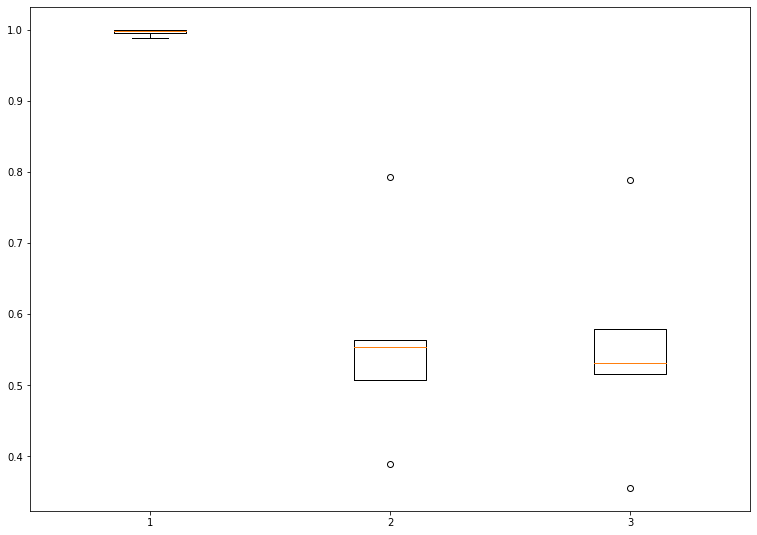

In [166]:
#BoxPlot for cross validation scores

data_KNN = [cvs_KNN_lda, cvs_KNN_pca, cvs_KNN_normal]

fig_KNN = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_KNN = fig_KNN.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_KNN = ax_KNN.boxplot(data_KNN)
  
# show plot
plt.show()

##Comparison for LDAs

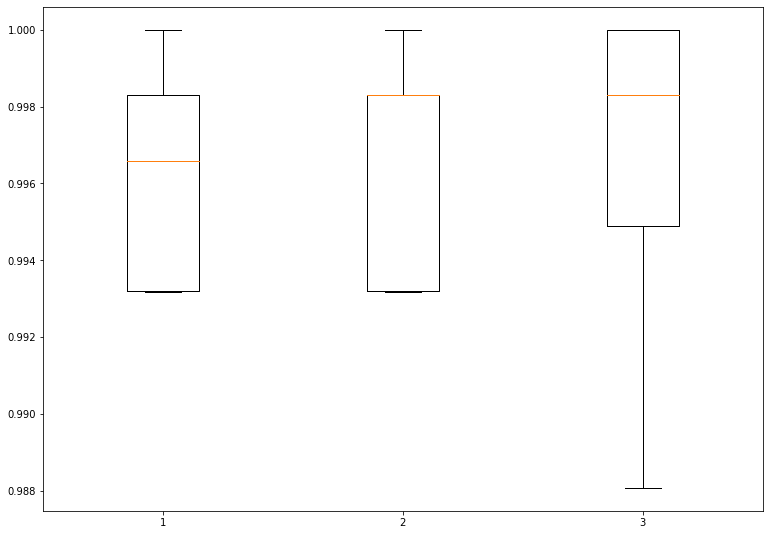

In [167]:
#BoxPlot for cross validation scores

data_LDA = [cvs_SVC_lda, cvs_MLP_lda, cvs_KNN_lda]

fig_LDA = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_LDA = fig_LDA.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_LDA = ax_LDA.boxplot(data_LDA)
  
# show plot
plt.show()

##Comparison for PCAs

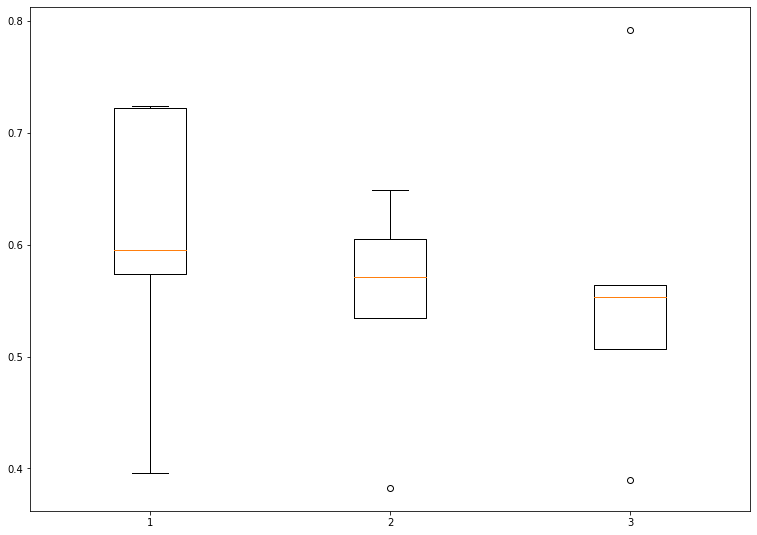

In [168]:
#BoxPlot for cross validation scores

data_PCA = [cvs_SVC_pca, cvs_MLP_pca, cvs_KNN_pca]

fig_PCA = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_PCA = fig_PCA.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_PCA = ax_PCA.boxplot(data_PCA)
  
# show plot
plt.show()

##Comparison for Normals

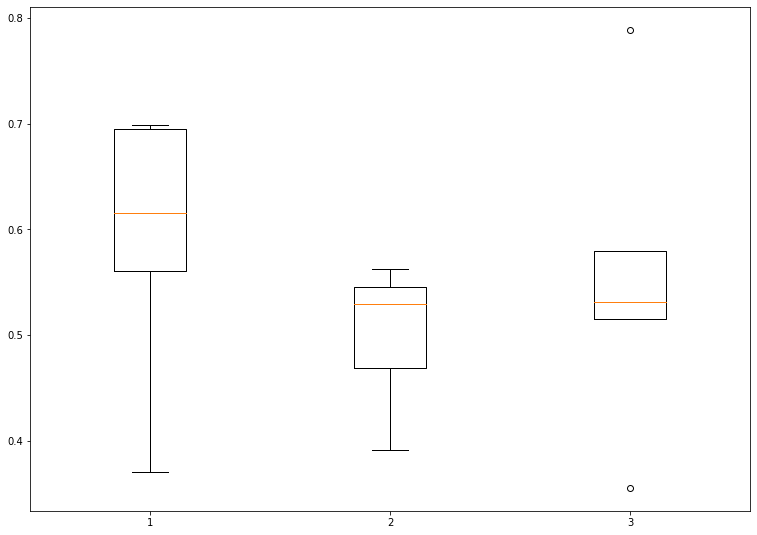

In [169]:
#BoxPlot for cross validation scores

data_NORMAL = [cvs_SVC_normal, cvs_MLP_normal, cvs_KNN_normal]

fig_NORMAL = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax_NORMAL = fig_NORMAL.add_axes([0, 0, 1, 1])
  
# Creating plot
bp_NORMAL = ax_NORMAL.boxplot(data_NORMAL)
  
# show plot
plt.show()